# Scan Plane Example Notebook

### Set up notebook to display images and interactive plots:

In [1]:
%matplotlib notebook
from IPython.display import Image
import json
import sys
sys.path.append(r'C:\Users\BF4K\Documents\GitHub\scanning-squid\scanning-squid')

### Import microscope class:

In [2]:
from microscope import SusceptometerMicroscope

### Initialize microscope object using configuration file:
Useful information will be printed to the screen and logged to ‘logs/scan_plane_example.log’

In [3]:
config_file = 'config_microscope.json'
m = SusceptometerMicroscope(config_file, 'RT', log_name='scan_plane_example')

INFO:2018-06-14_16:52:05:microscope:Logging started.
INFO:2018-06-14_16:52:05:microscope:Initializing microscope object using file config_microscope.json.
INFO:2018-06-14_16:52:05:atto:Initializing Attocube controller.


attocube ANC300 controller version 1.1.0-1304 2013-10-17 08:16


INFO:2018-06-14_16:52:12:microscope:Attocube controller successfully added to microscope.
INFO:2018-06-14_16:52:12:scanner:Moved scanner from [-0.001, -0.0, -0.001] V to [-0.0, -0.0, -0.001] V.
INFO:2018-06-14_16:52:12:microscope:Scanner successfully added to microscope.
INFO:2018-06-14_16:52:12:microscope:Susceptometer(SQUID) successfully added to microscope.


Connected to: Stanford_Research_Systems SR830 (serial:s/n53956, firmware:ver1.07) in 0.06s


INFO:2018-06-14_16:52:12:microscope:SUSC_lockin successfully added to microscope.


Connected to: Stanford_Research_Systems SR830 (serial:s/n53182, firmware:ver1.07) in 0.08s


INFO:2018-06-14_16:52:13:microscope:CAP_lockin successfully added to microscope.


#### These are the instruments contained in the microscope. Their metadata will automatically be saved.

In [4]:
m.components

{'atto': <ANC300: atto>,
 'benders': <Scanner: benders>,
 'SQUID': <Susceptometer: SQUID>,
 'SUSC_lockin': <SR830: SUSC_lockin>,
 'CAP_lockin': <SR830: CAP_lockin>}

#### Get current scanner position (in DAQ voltage units):
(`scanner.position()` is equivalent to `scanner.position.get()`)

In [5]:
m.scanner.position()

[0.0, -0.0, -0.001]

#### Retract scanner to $z$-position set in config_microscope.json

In [6]:
m.scanner.retract()

INFO:2018-06-14_16:52:14:scanner:Moved scanner from [-0.001, -0.0, -0.001] V to [-0.001, -0.0, -2.0] V.


(`scanner.goto([0,0,0])` is equivalent to `scanner.position([0,0,0])` and `scanner.position.set([0,0,0])`)

In [7]:
m.scanner.position()

[-0.001, -0.0, -2.0]

In [8]:
m.scanner.goto([0,0,0])

INFO:2018-06-14_16:52:15:scanner:Moved scanner from [-0.001, -0.0, -2.0] V to [-0.0, -0.0, -0.0] V.


In order to run scan_plane without acquiring a plane, we have to trick the microscope into thinking it has acquired a plane:

In [9]:
m.scanner.metadata['position'].update({'plane': {'x': 0.1, 'y': 0.1, 'z': 0.1}, 'plane_is_current': True})

### Load measurement configuration file:

In [10]:
with open('config_measurements.json') as f:
    measurements = json.load(f)

### Run the scan:

INFO:2018-06-14_16:52:21:utils:Scan parameters are valid. Starting scan.
INFO:2018-06-14_16:52:21:scanner:Moved scanner from [-0.001, -0.0, -0.0] V to [-1.5, -1.5009999999999999, -0.40000000000000002] V.
INFO:2018-06-14_16:52:21:microscope:Setting amplitude on SUSC_lockin to 1 V.
INFO:2018-06-14_16:52:21:microscope:Setting frequency on SUSC_lockin to 131.79 Hz.
INFO:2018-06-14_16:52:21:microscope:Setting amplitude on CAP_lockin to 1 V.
INFO:2018-06-14_16:52:21:microscope:Setting frequency on CAP_lockin to 18437.0 Hz.


<IPython.core.display.Javascript object>


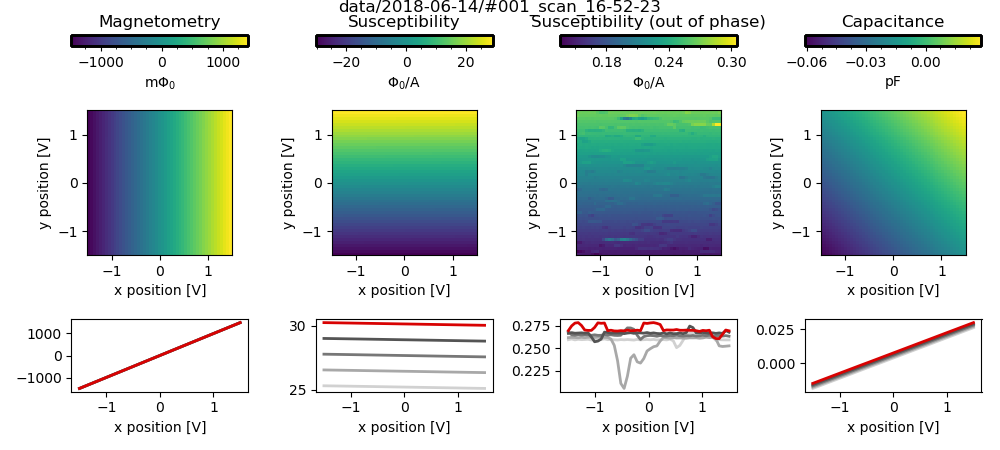

Started at 2018-06-14 16:52:23


INFO:2018-06-14_16:55:13:scanner:Moved scanner from [1.4990000000000001, 1.4990000000000001, 0.20000000000000001] V to [-0.001, -0.0, -0.001] V.
INFO:2018-06-14_16:55:13:microscope:Scan completed. DataSet saved to data/2018-06-14/#001_scan_16-52-23.
INFO:2018-06-14_16:55:13:microscope:Removed daq_ai from microscope.


DataSet:
   location = 'data/2018-06-14/#001_scan_16-52-23'
   <Type>   | <array_id>             | <array.name> | <array.shape>
   Setpoint | benders_position_y_set | position_y   | (50,)
   Measured | daq_ai_voltage         | voltage      | (50, 4, 50)
Finished at 2018-06-14 16:55:13


In [11]:
data0, plot0 = m.scan_plane(measurements['scan'])

#### We can change the scan fast axis from $x$ to $y$:

In [12]:
measurements['scan']['fast_ax'] = 'y'

### And run the scan again:

INFO:2018-06-14_16:55:14:utils:Scan parameters are valid. Starting scan.
INFO:2018-06-14_16:55:15:scanner:Moved scanner from [-0.0, -0.0, -0.0] V to [-1.5, -1.5, -0.40000000000000002] V.
INFO:2018-06-14_16:55:15:microscope:Setting amplitude on SUSC_lockin to 1 V.
INFO:2018-06-14_16:55:15:microscope:Setting frequency on SUSC_lockin to 131.79 Hz.
INFO:2018-06-14_16:55:15:microscope:Setting amplitude on CAP_lockin to 1 V.
INFO:2018-06-14_16:55:15:microscope:Setting frequency on CAP_lockin to 18437.0 Hz.


<IPython.core.display.Javascript object>


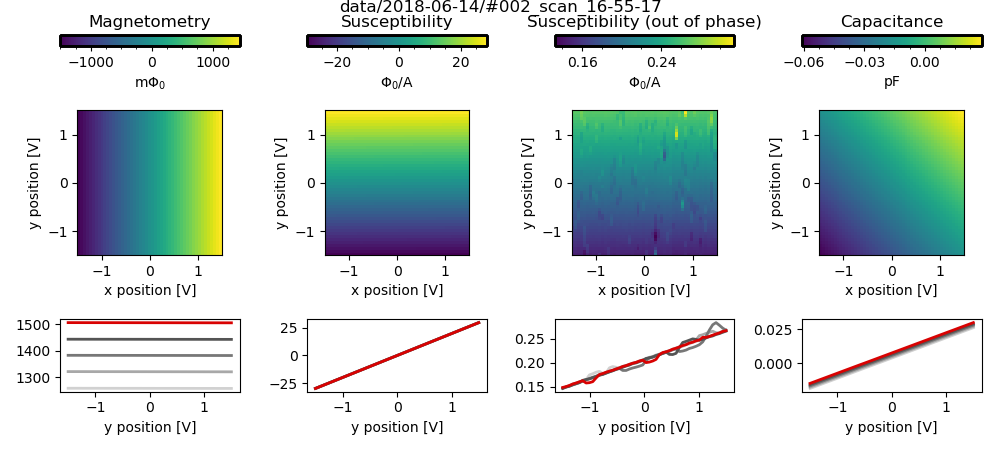

Started at 2018-06-14 16:55:17


INFO:2018-06-14_16:58:03:scanner:Moved scanner from [1.5, 1.5, 0.20000000000000001] V to [-0.0, -0.0, -0.001] V.
INFO:2018-06-14_16:58:03:microscope:Scan completed. DataSet saved to data/2018-06-14/#002_scan_16-55-17.
INFO:2018-06-14_16:58:03:microscope:Removed daq_ai from microscope.


DataSet:
   location = 'data/2018-06-14/#002_scan_16-55-17'
   <Type>   | <array_id>             | <array.name> | <array.shape>
   Setpoint | benders_position_x_set | position_x   | (50,)
   Measured | daq_ai_voltage         | voltage      | (50, 4, 50)
Finished at 2018-06-14 16:58:03


In [13]:
data1, plot1 = m.scan_plane(measurements['scan'])